In [9]:
import pandas as pd
import re
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

plt.style.use('./deeplearning.mplstyle')
RANDOM_STATE = 30

In [10]:
df = pd.read_csv("training_malicious_url.csv")
# df = pd.read_csv("combined_dataset.csv")
# df.head()

In [11]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Type'])
print(label_encoder.classes_)

['harmful' 'safe']


In [12]:
# Exclude the target column
features = [x for x in df.columns if x != 'Type']  
print(len(features))

7


In [13]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[features], y, test_size=0.2, random_state=42)

print(f'train samples: {len(X_train)}')
print(f'validation samples: {len(X_test)}')
print(f'target proportion: {sum(y_train)/len(y_train):.4f}')

train samples: 1440
validation samples: 360
target proportion: 0.5014


In [14]:
# Building random forest tree 
# min_samples_split: The minimum number of samples required to split an internal ndoe
# max_depth: The maximum depth of the tree
# An additionaly hyperparameter for Random Forest is called n_estimators, which is the 
# number of Decision Tress that make up the Random Forest

min_samples_split_list = [2, 5, 10, 15, 20, 30, 40, 50, 60, 80, 100, 150, 200, 250, 300, 700]
max_depth_list = [1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 16, 20, 32, 40, 64, None]
n_estimators_list = [10, 20, 50, 75, 100, 200, 500, 1000]

In [15]:
# Min Samples Split

accuracy_list_train = []
accuracy_list_val = []

for min_samples_split in min_samples_split_list:

    model = RandomForestClassifier(min_samples_split=min_samples_split,
                                   random_state=RANDOM_STATE).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_val = accuracy_score(predictions_test, y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

    print(f"min_samples_split={min_samples_split}, Train Accuracy={accuracy_train:.4f}, Validation Accuracy={accuracy_val:.4f}")

# plt.title('Train x Validation metrics')
# plt.xlabel('min_samples_split')
# plt.ylabel('accuracy')
# plt.xticks(ticks= range(len(min_samples_split_list)), labels=min_samples_split_list)
# plt.plot(accuracy_list_train)
# plt.plot(accuracy_list_val)
# plt.legend(['Train', 'Validation'])

min_samples_split=2, Train Accuracy=0.9889, Validation Accuracy=0.9083
min_samples_split=5, Train Accuracy=0.9792, Validation Accuracy=0.9056
min_samples_split=10, Train Accuracy=0.9507, Validation Accuracy=0.9111
min_samples_split=15, Train Accuracy=0.9375, Validation Accuracy=0.9028
min_samples_split=20, Train Accuracy=0.9250, Validation Accuracy=0.9167
min_samples_split=30, Train Accuracy=0.9090, Validation Accuracy=0.8889
min_samples_split=40, Train Accuracy=0.8944, Validation Accuracy=0.8778
min_samples_split=50, Train Accuracy=0.8903, Validation Accuracy=0.8778
min_samples_split=60, Train Accuracy=0.8833, Validation Accuracy=0.8611
min_samples_split=80, Train Accuracy=0.8729, Validation Accuracy=0.8528
min_samples_split=100, Train Accuracy=0.8674, Validation Accuracy=0.8528
min_samples_split=150, Train Accuracy=0.8507, Validation Accuracy=0.8500
min_samples_split=200, Train Accuracy=0.8278, Validation Accuracy=0.8222
min_samples_split=250, Train Accuracy=0.8042, Validation Accura

In [16]:
# Max depth

accuracy_list_train = []
accuracy_list_val = []

for max_depth in max_depth_list:

    model = RandomForestClassifier(max_depth=max_depth,
                                   random_state=RANDOM_STATE).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_val = accuracy_score(predictions_test, y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

    print(f"max_depth={max_depth}, Train Accuracy={accuracy_train:.4f}, Validation Accuracy={accuracy_val:.4f}")

# plt.title('Train x Validation metrics')
# plt.xlabel('max_depth')
# plt.ylabel('accuracy')
# plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
# plt.plot(accuracy_list_train)
# plt.plot(accuracy_list_val)
# plt.legend(['Train','Validation'])

max_depth=1, Train Accuracy=0.7701, Validation Accuracy=0.7889
max_depth=2, Train Accuracy=0.7819, Validation Accuracy=0.7944
max_depth=3, Train Accuracy=0.8132, Validation Accuracy=0.8194
max_depth=4, Train Accuracy=0.8507, Validation Accuracy=0.8556
max_depth=5, Train Accuracy=0.8604, Validation Accuracy=0.8472
max_depth=6, Train Accuracy=0.8799, Validation Accuracy=0.8611
max_depth=7, Train Accuracy=0.9056, Validation Accuracy=0.8861
max_depth=8, Train Accuracy=0.9187, Validation Accuracy=0.8833
max_depth=10, Train Accuracy=0.9535, Validation Accuracy=0.8944
max_depth=12, Train Accuracy=0.9785, Validation Accuracy=0.9056
max_depth=16, Train Accuracy=0.9889, Validation Accuracy=0.9083
max_depth=20, Train Accuracy=0.9889, Validation Accuracy=0.9083
max_depth=32, Train Accuracy=0.9889, Validation Accuracy=0.9083
max_depth=40, Train Accuracy=0.9889, Validation Accuracy=0.9083
max_depth=64, Train Accuracy=0.9889, Validation Accuracy=0.9083
max_depth=None, Train Accuracy=0.9889, Validatio

In [17]:
# N Estimators

accuracy_list_train = []
accuracy_list_val = []

for n_estimators in n_estimators_list:

    model = RandomForestClassifier(n_estimators=n_estimators,
                                   random_state=RANDOM_STATE).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_val = accuracy_score(predictions_test, y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

    print(f"n_estimators={n_estimators}, Train Accuracy={accuracy_train:.4f}, Validation Accuracy={accuracy_val:.4f}")

# plt.title('Train x Validation metrics')
# plt.xlabel('n_estimators')
# plt.ylabel('accuracy')
# plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
# plt.plot(accuracy_list_train)
# plt.plot(accuracy_list_val)
# plt.legend(['Train','Validation'])

n_estimators=10, Train Accuracy=0.9847, Validation Accuracy=0.8972
n_estimators=20, Train Accuracy=0.9875, Validation Accuracy=0.8972
n_estimators=50, Train Accuracy=0.9889, Validation Accuracy=0.8972
n_estimators=75, Train Accuracy=0.9889, Validation Accuracy=0.9083
n_estimators=100, Train Accuracy=0.9889, Validation Accuracy=0.9083
n_estimators=200, Train Accuracy=0.9889, Validation Accuracy=0.9083
n_estimators=500, Train Accuracy=0.9889, Validation Accuracy=0.9139
n_estimators=1000, Train Accuracy=0.9889, Validation Accuracy=0.9111


In [18]:
random_forest_model = RandomForestClassifier(n_estimators = 200,
                                             max_depth = 10, 
                                             min_samples_split = 5).fit(X_train,y_train)

In [19]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_test),y_test):.4f}")

Metrics train:
	Accuracy score: 0.9431
Metrics test:
	Accuracy score: 0.9139


In [20]:
n = int(len(X_train)*0.8)
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

In [21]:
eval_set = [(X_train_eval,y_train_eval)]
# early_stopping_rounds = 10

# This code builds and trains a smart model to make predictions, and it tries to avoid overfitting by stopping early if the model stops improving.
xgb_model = XGBClassifier(n_estimators = 200, learning_rate = 0.05,verbosity = 1, random_state = RANDOM_STATE, early_stopping_rounds=10)
xgb_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)])

[0]	validation_0-logloss:0.67080
[1]	validation_0-logloss:0.64957
[2]	validation_0-logloss:0.63019
[3]	validation_0-logloss:0.61204
[4]	validation_0-logloss:0.59547
[5]	validation_0-logloss:0.58040
[6]	validation_0-logloss:0.56686
[7]	validation_0-logloss:0.55343
[8]	validation_0-logloss:0.54101
[9]	validation_0-logloss:0.52958
[10]	validation_0-logloss:0.51869
[11]	validation_0-logloss:0.50907
[12]	validation_0-logloss:0.49980
[13]	validation_0-logloss:0.49158
[14]	validation_0-logloss:0.48292
[15]	validation_0-logloss:0.47588
[16]	validation_0-logloss:0.46897
[17]	validation_0-logloss:0.46162
[18]	validation_0-logloss:0.45492
[19]	validation_0-logloss:0.44861
[20]	validation_0-logloss:0.44050
[21]	validation_0-logloss:0.43314
[22]	validation_0-logloss:0.42662
[23]	validation_0-logloss:0.42063
[24]	validation_0-logloss:0.41409
[25]	validation_0-logloss:0.40765
[26]	validation_0-logloss:0.40112
[27]	validation_0-logloss:0.39788
[28]	validation_0-logloss:0.39199
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=30, ...)

In [22]:
xgb_model.best_iteration

160

In [23]:
# Generate predictions on test data
y_pred_url = xgb_model.predict(X_test)

# Save predictions for meta-model training
url_predictions = pd.DataFrame({"url_pred": y_pred_url, "type": y_test})
url_predictions.to_csv("url_model_predictions.csv", index=False)

In [24]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train), y_train):.4f}")
print(f"Metrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_test), y_test):.4f}")

Metrics train:
	Accuracy score: 0.9437
Metrics test:
	Accuracy score: 0.9222


[[166  16]
 [ 12 166]]


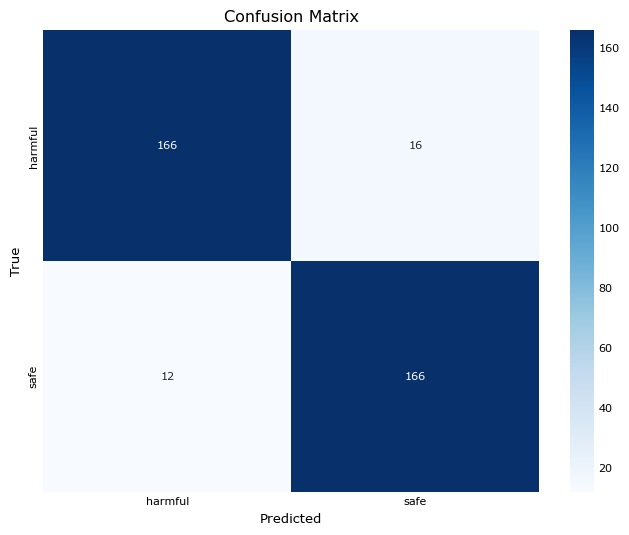

In [25]:
cm = confusion_matrix(y_test, xgb_model.predict(X_test))
print(cm)
# Get the confusion matrix
cm = confusion_matrix(y_test, xgb_model.predict(X_test))

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [26]:
print(classification_report(y_test, xgb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       182
           1       0.91      0.93      0.92       178

    accuracy                           0.92       360
   macro avg       0.92      0.92      0.92       360
weighted avg       0.92      0.92      0.92       360



In [27]:
def extract_features(url):
    feature = {}
    feature['url_length'] = len(url)
    feature['num_special_chars'] = sum(1 for c in url if c in ['?', '=', '&', '%', '@', '-', '_'])
    feature['num_digit'] = sum(c.isdigit() for c in url)
    feature['num_subdomains'] = url.count('.')
    parsed_url = urlparse(url)
    feature['path_length'] = len(parsed_url.path)
    feature['num_path_segments'] = parsed_url.path.count('/')
    suspicious_keywords = ['pay', '.io', 'login', 'secure', 'wallet', 'auth', 'support', 'block']
    feature['num_suspicious_keywords'] = sum(1 for keyword in suspicious_keywords if keyword in url)
    return feature

In [28]:
url = "https://eezxodullgeunn.webflow.io" # phishing
# url = "meliksahbardakci.com/components/index.htm" # Supposedly safe

new_features = extract_features(url)

new_features_df = pd.DataFrame([new_features])
# print(new_features_df)

prediction = random_forest_model.predict(new_features_df)

predicted_class = label_encoder.inverse_transform(prediction)

# Output the prediction
print(f"Prediction for URL '{url}' -> {predicted_class[0]}")

Prediction for URL 'https://eezxodullgeunn.webflow.io' -> harmful


                   Feature  Importance
4              path_length    0.253889
3           num_subdomains    0.150556
0               url_length    0.136111
5        num_path_segments    0.077778
1        num_special_chars    0.033889
2                num_digit    0.031111
6  num_suspicious_keywords   -0.001111


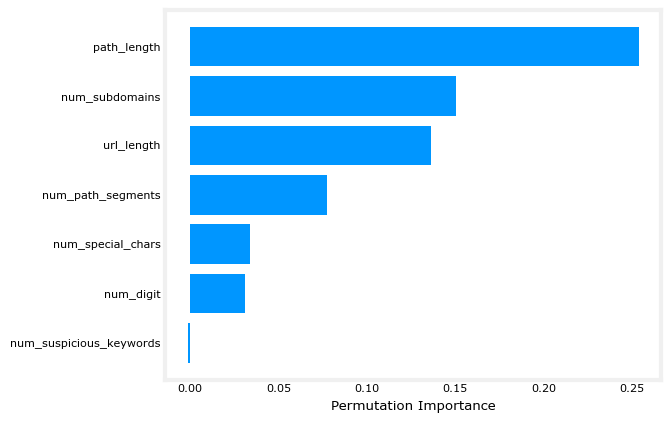

In [29]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(model, X_test, y_test, scoring="accuracy")

importance_df = pd.DataFrame({
    "Feature": X_test.columns,
    "Importance": perm_importance.importances_mean
}).sort_values(by="Importance", ascending=False)

print(importance_df)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X_test.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()

In [30]:
# import joblib
# joblib.dump(xgb_model, "url_model.joblib")

# xgb_model.save_model("url_model.json")